<h1 style="color:blue; background:lightgreen; text-align:center; line-height:3"> Prediction of Graduate Admissions
From An Indian Perspective </h1>

<h2 style="color:blue; background:pink; line-height:1.2">Problem Statement</h2>
<h3 style="color:gray">This dataset is created for prediction of Graduate Admissions from an Indian perspective.</h3>

<p><h2 style="color:blue; background:pink; line-height:1.3;">Parameters/Features</h2><br>
<h3 style="color:gray">1. GRE Scores - Graduat Record Examination Score (out of 340)<br>
    2. TOEFL Scores - Test of English as a Foreign Language Score (out of 120)<br>
    3. University Rating (out of 5)<br>
    4. Statement of Purpose Strength (out of 5)<br>
    5. Letter of Recommendation Strength (out of 5)<br>
    6. Undergraduate GPA (out of 10)<br>
    7. Research Experience (either 0 or 1)<br>
    8. Chance of Admit (ranging from 0 to 1)</h3></p>

<h2 style="color:blue; background:pink; line-height:1.2">Import basic required libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

<h2 style="color:blue; background:pink; line-height:1.2">Load Dataset</h2>

In [2]:
df=pd.read_csv('data\Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<h2 style="color:blue; background:pink; line-height:1.2">Understand Dataset</h2>

In [3]:
df.shape

(400, 9)

In [4]:
df.size

3600

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**Some column names are not in proper format**

In [6]:
df.columns=df.columns.str.strip()
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

df.columns

In [7]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


<h2 style="color:blue; background:pink; line-height:1.2">Missing Values</h2>

In [9]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<h2 style="color:blue; background:pink; line-height:1.2">Duplicate Values</h2>

In [10]:
df.duplicated().sum()

0

<h2 style="color:blue; background:pink; line-height:1.2">Exploratory Data Analysis</h2>

<h2 style="color:blue; background:yellow; line-height:1.2">Univariate Analysis</h2>

<h2 style="color:blue; background:lightgreen; line-height:1">1. Analyze GRE Score</h2>

In [11]:
df['GRE Score'].dtypes

dtype('int64')

In [12]:
df['GRE Score'].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

**<code style="color:brown">Maximum GRE Score is 340, Minimum is 290, Average Score is 316 and the standard deviation is 11.</code>**

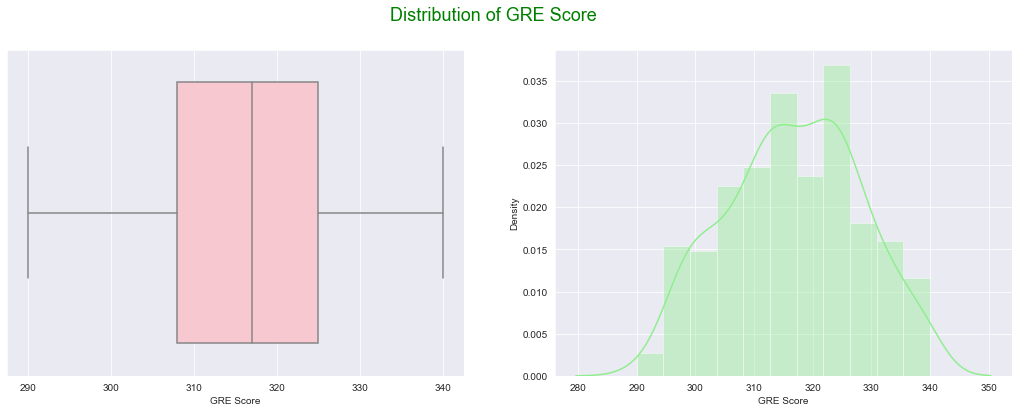

In [13]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(df['GRE Score'], color='pink')

plt.subplot(122)
sns.distplot(df['GRE Score'], kde=True, color='lightgreen');
plt.suptitle("Distribution of GRE Score", fontsize=18, color='green');

**<code style="color:brown">Distribution is look normal and no outliers in this column.</code>**

**<code style="color:red">------------------------------------------------------------------------------------------------------------------------------<code>**

<h2 style="color:blue; background:lightgreen; line-height:1">2. Analyze TOEFL Score</h2>

In [14]:
df['TOEFL Score'].dtypes

dtype('int64')

In [15]:
df['TOEFL Score'].describe()

count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

**<code style="color:brown">Maximum TOEFL Score is 120, Minimum is 92, Average Score is 107 and the standard deviation is 6.</code>**

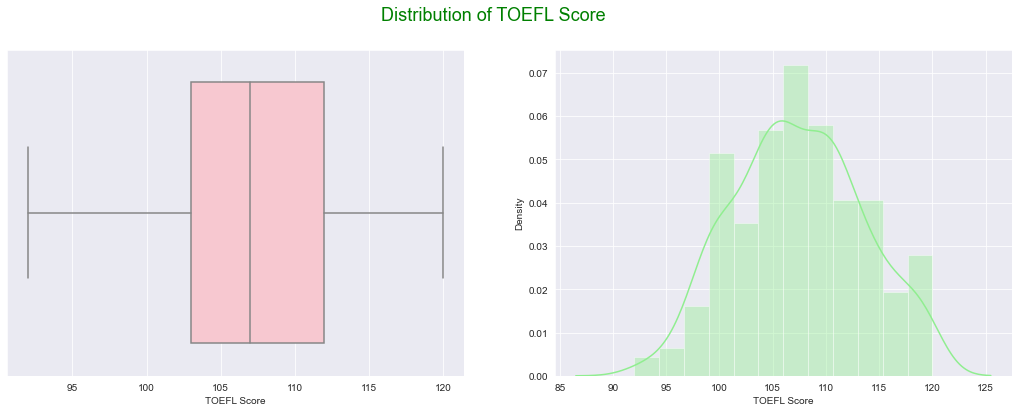

In [16]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(df['TOEFL Score'], color='pink')

plt.subplot(122)
sns.distplot(df['TOEFL Score'], kde=True, color='lightgreen');
plt.suptitle("Distribution of TOEFL Score", fontsize=18, color='green');

**<code style="color:brown">Distribution is look normal and no outliers in this column.</code>**

**<code style="color:red">------------------------------------------------------------------------------------------------------------------------------<code>**

<h2 style="color:blue; background:lightgreen; line-height:1">3. Analyze CGPA Score</h2>

In [17]:
df['CGPA'].dtypes

dtype('float64')

In [18]:
df['CGPA'].describe()

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: CGPA, dtype: float64

**<code style="color:brown">Maximum CGPA is 9.92, Minimum is 7.20, Average GPA is 8.60 and the standard deviation is 0.59.</code>**

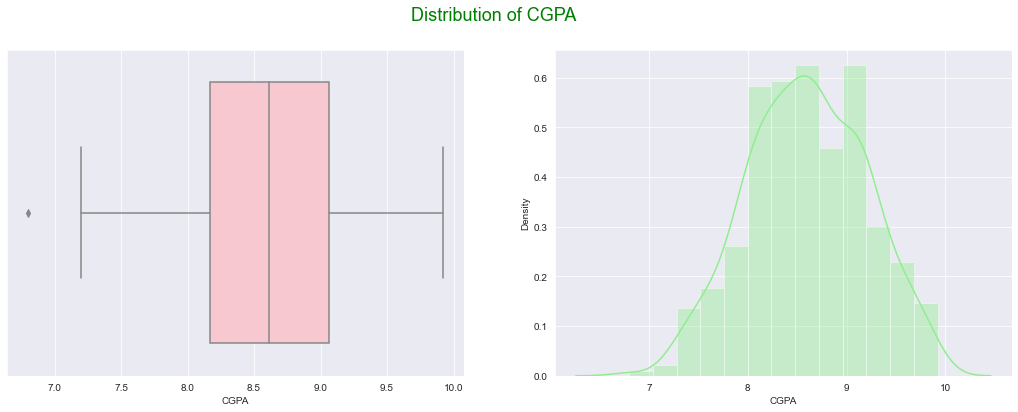

In [19]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(df['CGPA'], color='pink')

plt.subplot(122)
sns.distplot(df['CGPA'], kde=True, color='lightgreen');
plt.suptitle("Distribution of CGPA", fontsize=18, color='green');

**<code style="color:brown">Distribution is look normal and 1 outliers data point is present in this column. Lets drop that data point.</code>**

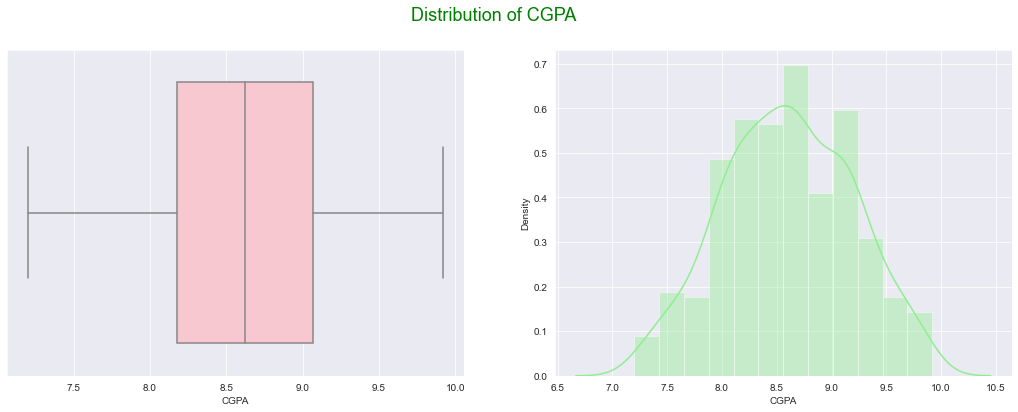

In [20]:
df=df[df['CGPA']>7.0]

plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(df['CGPA'], color='pink')

plt.subplot(122)
sns.distplot(df['CGPA'], kde=True, color='lightgreen');
plt.suptitle("Distribution of CGPA", fontsize=18, color='green');

**<code style="color:red">------------------------------------------------------------------------------------------------------------------------------<code>**

<h2 style="color:blue; background:lightgreen; line-height:1">4. Analyze SOP Score</h2>

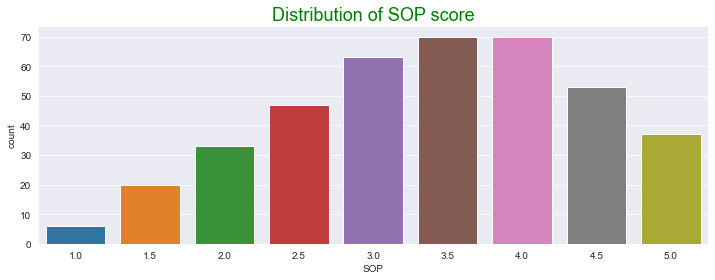

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(df['SOP']);
plt.title("Distribution of SOP score", fontsize=18, color='green');

**<code style="color:brown">Maximum job seekers have SOP score 3.5 and 4.</code>**

**<code style="color:red">------------------------------------------------------------------------------------------------------------------------------<code>**

<h2 style="color:blue; background:lightgreen; line-height:1">5. Analyze LOR Score</h2>

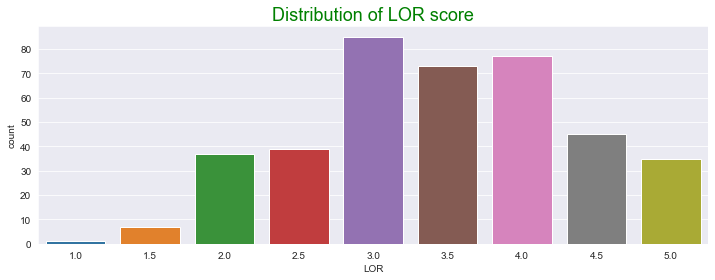

In [22]:
plt.figure(figsize=(12,4))
sns.countplot(df['LOR']);
plt.title("Distribution of LOR score", fontsize=18, color='green');

**<code style="color:brown">Maximum job seekers have LOR score 3 and 4.</code>**

**<code style="color:red">------------------------------------------------------------------------------------------------------------------------------<code>**

<h2 style="color:blue; background:lightgreen; line-height:1">6. Analyze University Rating</h2>

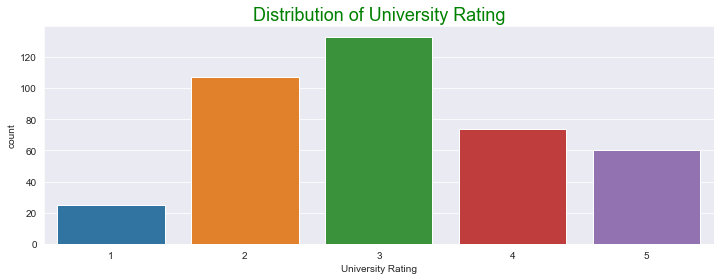

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(df['University Rating']);
plt.title("Distribution of University Rating", fontsize=18, color='green');

**<code style="color:brown">Maximum job seekers University Rating 3.</code>**

**<code style="color:red">------------------------------------------------------------------------------------------------------------------------------<code>**

<h2 style="color:blue; background:lightgreen; line-height:1">7. Analyze Research Score</h2>

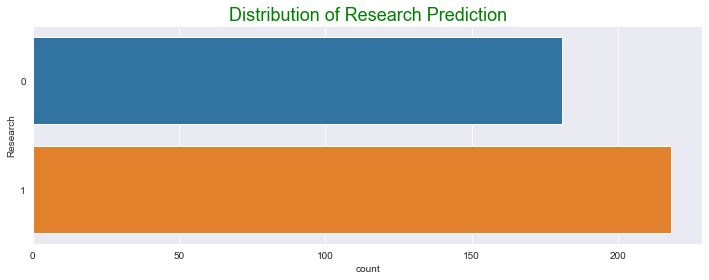

In [24]:
plt.figure(figsize=(12,4))
sns.countplot(y=df['Research']);
plt.title("Distribution of Research Prediction", fontsize=18, color='green');

**<code style="color:red">------------------------------------------------------------------------------------------------------------------------------<code>**

<h2 style="color:blue; background:lightgreen; line-height:1">8. Analyze Chance of Admit</h2>

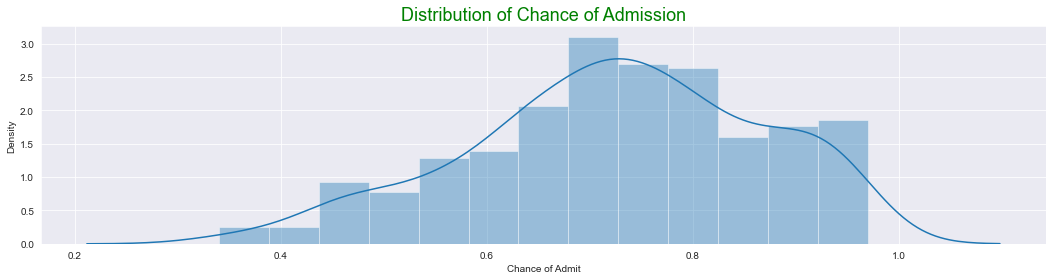

In [25]:
plt.figure(figsize=(18,4))
sns.distplot(df['Chance of Admit']);
plt.title("Distribution of Chance of Admission", fontsize=18, color='green');

**<code style="color:red">--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<code>**

<h2 style="color:blue; background:yellow; line-height:1.2">Bivariate Analysis</h2>

### Target Variable here is Reasearch so, Lets analyze other features wrt to this column

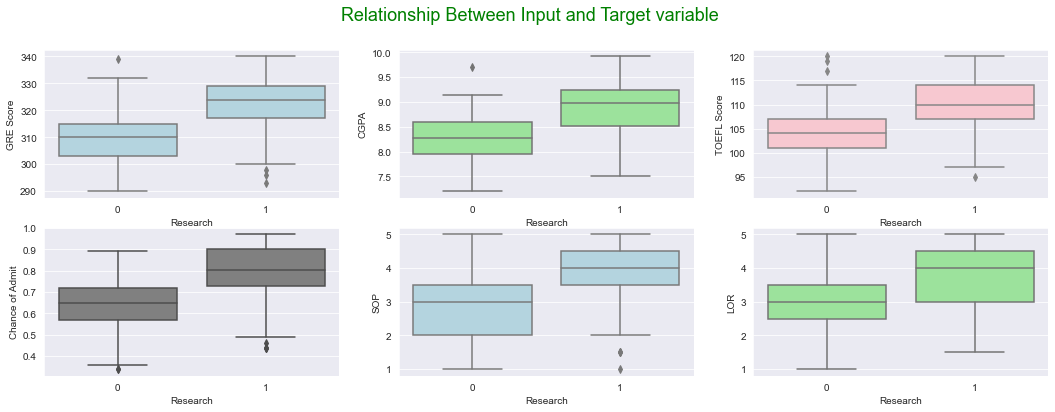

In [26]:
plt.figure(figsize=(18,6))
plt.subplot(231)
sns.boxplot(y=df['GRE Score'], x=df['Research'], color='lightblue');

plt.subplot(232)
sns.boxplot(y=df['CGPA'], x=df['Research'], color='lightgreen');

plt.subplot(233)
sns.boxplot(y=df['TOEFL Score'], x=df['Research'], color='pink');

plt.subplot(234)
sns.boxplot(y=df['Chance of Admit'], x=df['Research'], color='gray');

plt.subplot(235)
sns.boxplot(y=df['SOP'], x=df['Research'], color='lightblue');

plt.subplot(236)
sns.boxplot(y=df['LOR'], x=df['Research'], color='lightgreen');

plt.suptitle("Relationship Between Input and Target variable", fontsize=18, color='green');

**<code style="color:red;">Higher GRE Score, CGPGA, TOEFL Score and Chance of admit, SOP, LOR score,  higher the chance of Admission.</code>**

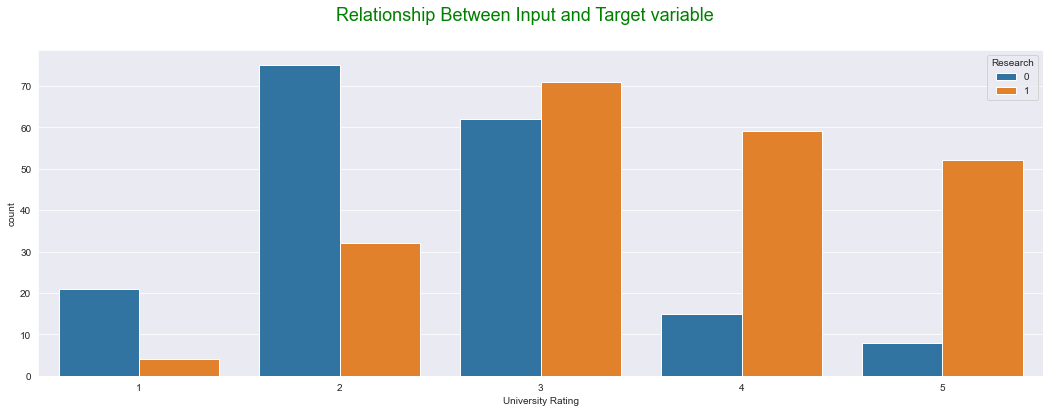

In [27]:
plt.figure(figsize=(18,6))
sns.countplot(x=df['University Rating'], hue=df['Research']);
plt.suptitle("Relationship Between Input and Target variable", fontsize=18, color='green');

**<code style="color:red">Higher the University Rating higher the chances of Admission</code>**

**<code style="color:red">--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<code>**

<h2 style="color:blue; background:pink; line-height:1.2">Feature Creation</h2>

### Here derive target variable from column "chance of admit", if the value is greater than 0.75 then label 1, else label 0.

In [62]:
df['Label']=np.where(df['Chance of Admit']>0.72, 1, 0)
df['Label'].value_counts()

1    204
0    195
Name: Label, dtype: int64

<h2 style="color:blue; background:pink; line-height:1.2">Feature Importance and Feature Selection</h2>

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
x=df.drop('Label', axis=1)
y=df['Label']
rf_classifier.fit(x, y)
for name, importance in zip(x, rf_classifier.feature_importances_):
    print(name, "=", importance)

Serial No. = 0.013493034158370954
GRE Score = 0.12526620467134217
TOEFL Score = 0.045950425102377325
University Rating = 0.02697130910490264
SOP = 0.02330892375631959
LOR = 0.010131943629546464
CGPA = 0.1509440704663755
Research = 0.020104817826251824
Chance of Admit = 0.5838292712845137


**<code style="color:red">Selecting Features with value greater than 0.05</code>**

<h2 style="color:blue; background:pink; line-height:1.2">Input and Output or Target features</h2>

In [73]:
X=df.drop(['Serial No.', 'University Rating', 'Chance of Admit'], axis=1)
y=df['Research']

<h2 style="color:blue; background:pink; line-height:1.2">Train Test Split</h2>

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print("x train shape", x_train.shape)
print("x test shape", x_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)

x train shape (319, 7)
x test shape (80, 7)
y train shape (319,)
y test shape (80,)


<h2 style="color:blue; background:pink; line-height:1.2">Scale the input features</h2>

In [75]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler.fit(x_train)
x_train_tf=std_scaler.transform(x_train)
x_test_tf=std_scaler.transform(x_test)
x_train_tf[:5]

array([[ 0.41763267,  0.39404435,  0.07923115, -1.11001196,  0.09187897,
         0.91287093,  0.94211144],
       [ 0.05780871,  0.39404435,  0.5748142 , -0.54795829,  0.31587784,
        -1.09544512, -1.06144556],
       [-1.29153115, -1.62523511, -1.40751801, -1.11001196, -1.66565066,
        -1.09544512, -1.06144556],
       [ 0.32767668,  0.56231763,  0.07923115,  0.57614907,  0.36756989,
         0.91287093,  0.94211144],
       [-0.75179521,  0.05749777, -0.91193496, -0.54795829, -0.85580858,
        -1.09544512, -1.06144556]])

In [76]:
x_test_tf[:5]

array([[-0.39197124, -0.11077552,  0.5748142 ,  1.13820274,  0.12634033,
        -1.09544512, -1.06144556],
       [ 0.05780871, -0.11077552, -0.4163519 ,  0.01409539, -0.59734834,
         0.91287093,  0.94211144],
       [ 2.0368405 ,  1.0671375 ,  0.5748142 ,  0.57614907,  1.69433245,
         0.91287093,  0.94211144],
       [-1.47144313, -0.61559538,  0.07923115,  0.57614907, -0.85580858,
         0.91287093, -1.06144556],
       [-1.29153115, -1.45696182, -1.40751801, -1.11001196, -1.64841998,
        -1.09544512, -1.06144556]])

<h2 style="color:blue; background:pink; line-height:1.2">Build Machine Learning Classification Model</h2>

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

<h2 style="color:blue; background:lightgreen; line-height:1.1">1. Logistic Regression</h2>

----------------------------------------------------------
Acuuracy=1.0
Precission=1.0
Recall=1.0
F1 Score=1.0
----------------------------------------------------------
Confusion Matrix=



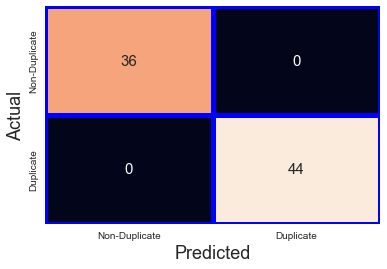

----------------------------------------------------------
Out of 80 testing values 0 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

----------------------------------------------------------


In [77]:
lr=LogisticRegression()
lr.fit(x_train_tf,y_train)
    
y_pred=lr.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
    
print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")

result=pd.DataFrame({"Algorithm":["Logistic"], "Accuracy":[acc], "Precision":[precision], "Recall":[recall], "F1 Score":[f1]})

<h2 style="color:blue; background:lightgreen; line-height:1.1">2. KNN Classifier</h2>

----------------------------------------------------------
Acuuracy=0.9875
Precission=1.0
Recall=0.9772727272727273
F1 Score=0.9885057471264368
----------------------------------------------------------
Confusion Matrix=



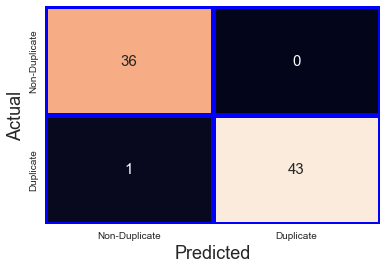

----------------------------------------------------------
Out of 80 testing values 1 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.98      0.99        44

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

----------------------------------------------------------


In [78]:
knn=KNeighborsClassifier()
knn.fit(x_train_tf,y_train)
    
y_pred=knn.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
    
print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")

results=pd.DataFrame({"Algorithm":["KNN"], "Accuracy":[acc], "Precision":[precision], "Recall":[recall], "F1 Score":[f1]})
result=pd.concat([result, results])

<h2 style="color:blue; background:lightgreen; line-height:1.1">3. SVM Classifier</h2>

----------------------------------------------------------
Acuuracy=1.0
Precission=1.0
Recall=1.0
F1 Score=1.0
----------------------------------------------------------
Confusion Matrix=



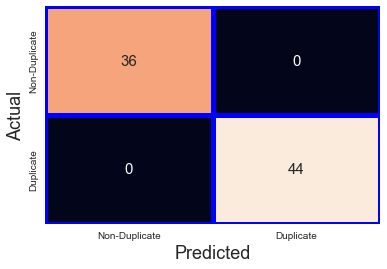

----------------------------------------------------------
Out of 80 testing values 0 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

----------------------------------------------------------


In [79]:
svm=SVC()
svm.fit(x_train_tf,y_train)
    
y_pred=svm.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
    
print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")

results=pd.DataFrame({"Algorithm":["SVM"], "Accuracy":[acc], "Precision":[precision], "Recall":[recall], "F1 Score":[f1]})
result=pd.concat([result, results])

<h2 style="color:blue; background:lightgreen; line-height:1.1">4. Naive Bayes</h2>

----------------------------------------------------------
Acuuracy=1.0
Precission=1.0
Recall=1.0
F1 Score=1.0
----------------------------------------------------------
Confusion Matrix=



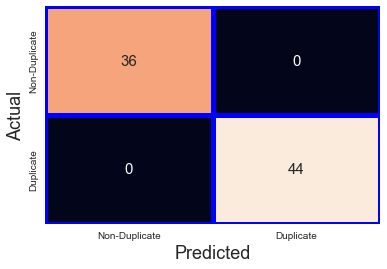

----------------------------------------------------------
Out of 80 testing values 0 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

----------------------------------------------------------


In [80]:
naive=GaussianNB()
naive.fit(x_train_tf,y_train)
    
y_pred=naive.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
    
print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")

results=pd.DataFrame({"Algorithm":["Naive Bayes"], "Accuracy":[acc], "Precision":[precision], "Recall":[recall], "F1 Score":[f1]})
result=pd.concat([result, results])

<h2 style="color:blue; background:lightgreen; line-height:1.1">5. Decision Tree Classifier</h2>

----------------------------------------------------------
Acuuracy=1.0
Precission=1.0
Recall=1.0
F1 Score=1.0
----------------------------------------------------------
Confusion Matrix=



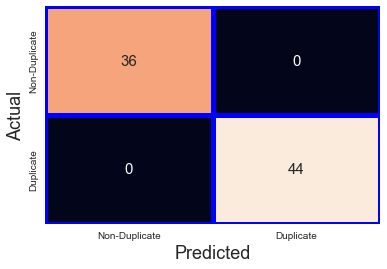

----------------------------------------------------------
Out of 80 testing values 0 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

----------------------------------------------------------


In [81]:
dt=DecisionTreeClassifier()
dt.fit(x_train_tf,y_train)
    
y_pred=dt.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
    
print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")

results=pd.DataFrame({"Algorithm":["Decision Tree"], "Accuracy":[acc], "Precision":[precision], "Recall":[recall], "F1 Score":[f1]})
result=pd.concat([result, results])

<h2 style="color:blue; background:lightgreen; line-height:1.1">6. Random Forest Classifier</h2>

----------------------------------------------------------
Acuuracy=1.0
Precission=1.0
Recall=1.0
F1 Score=1.0
----------------------------------------------------------
Confusion Matrix=



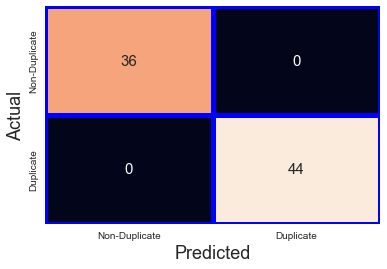

----------------------------------------------------------
Out of 80 testing values 0 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

----------------------------------------------------------


In [82]:
rf=RandomForestClassifier()
rf.fit(x_train_tf,y_train)
    
y_pred=rf.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
    
print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")

results=pd.DataFrame({"Algorithm":["Random Forest"], "Accuracy":[acc], "Precision":[precision], "Recall":[recall], "F1 Score":[f1]})
result=pd.concat([result, results])

<h2 style="color:blue; background:lightgreen; line-height:1.1">7. Extra Tree Classifier</h2>

----------------------------------------------------------
Acuuracy=1.0
Precission=1.0
Recall=1.0
F1 Score=1.0
----------------------------------------------------------
Confusion Matrix=



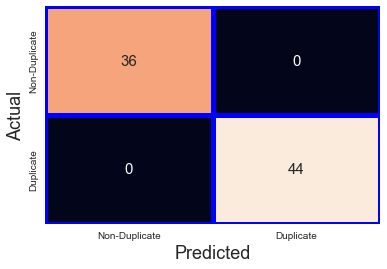

----------------------------------------------------------
Out of 80 testing values 0 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

----------------------------------------------------------


In [83]:
ext=ExtraTreesClassifier()
ext.fit(x_train_tf,y_train)
    
y_pred=ext.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
    
print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")

results=pd.DataFrame({"Algorithm":["Extra Tree"], "Accuracy":[acc], "Precision":[precision], "Recall":[recall], "F1 Score":[f1]})
result=pd.concat([result, results])

<h2 style="color:blue; background:lightgreen; line-height:1.1">8. Gradient Boosting Classifier</h2>

----------------------------------------------------------
Acuuracy=1.0
Precission=1.0
Recall=1.0
F1 Score=1.0
----------------------------------------------------------
Confusion Matrix=



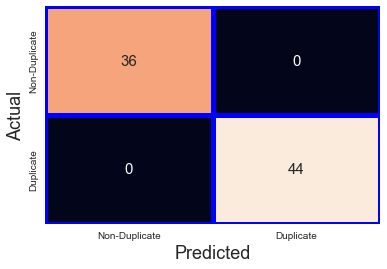

----------------------------------------------------------
Out of 80 testing values 0 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

----------------------------------------------------------


In [84]:
gb=GradientBoostingClassifier()
gb.fit(x_train_tf,y_train)
    
y_pred=gb.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
    
print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")

results=pd.DataFrame({"Algorithm":["Gradient Boosting"], "Accuracy":[acc], "Precision":[precision], "Recall":[recall], "F1 Score":[f1]})
result=pd.concat([result, results])

<h2 style="color:blue; background:lightgreen; line-height:1.1">9. Ada Boost Classifier</h2>

----------------------------------------------------------
Acuuracy=1.0
Precission=1.0
Recall=1.0
F1 Score=1.0
----------------------------------------------------------
Confusion Matrix=



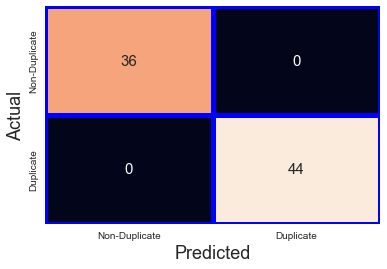

----------------------------------------------------------
Out of 80 testing values 0 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

----------------------------------------------------------


In [85]:
ada=AdaBoostClassifier()
ada.fit(x_train_tf,y_train)
    
y_pred=ada.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
    
print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")

results=pd.DataFrame({"Algorithm":["Ada Boost"], "Accuracy":[acc], "Precision":[precision], "Recall":[recall], "F1 Score":[f1]})
result=pd.concat([result, results])

<h2 style="color:blue; background:lightgreen; line-height:1.1">10. XGBoost Classifier</h2>

----------------------------------------------------------
Acuuracy=1.0
Precission=1.0
Recall=1.0
F1 Score=1.0
----------------------------------------------------------
Confusion Matrix=



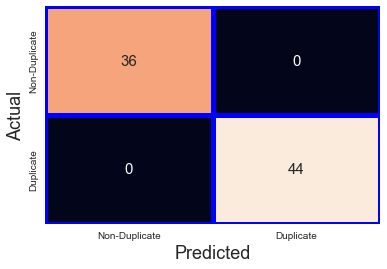

----------------------------------------------------------
Out of 80 testing values 0 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

----------------------------------------------------------


In [86]:
xgb_classifier=XGBClassifier()
xgb_classifier.fit(x_train_tf,y_train)
    
y_pred=xgb_classifier.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
    
print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")

results=pd.DataFrame({"Algorithm":["XG Boost"], "Accuracy":[acc], "Precision":[precision], "Recall":[recall], "F1 Score":[f1]})
result=pd.concat([result, results])

<h2 style="color:blue; background:pink; line-height:1.2">Comparing results of all algorithms</h2>

In [87]:
result

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Logistic,1.0000,1.0,1.000000,1.000000
0,KNN,0.9875,1.0,0.977273,0.988506
0,SVM,1.0000,1.0,1.000000,1.000000
0,Naive Bayes,1.0000,1.0,1.000000,1.000000
0,Decision Tree,1.0000,1.0,1.000000,1.000000
0,Random Forest,1.0000,1.0,1.000000,1.000000
0,Extra Tree,1.0000,1.0,1.000000,1.000000
0,Gradient Boosting,1.0000,1.0,1.000000,1.000000
0,Ada Boost,1.0000,1.0,1.000000,1.000000
0,XG Boost,1.0000,1.0,1.000000,1.000000


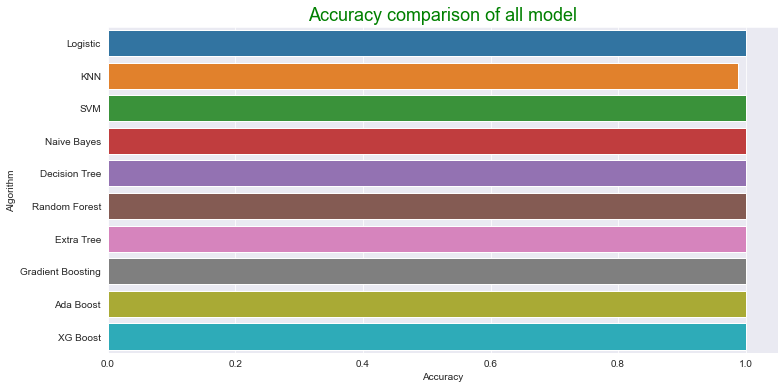

In [88]:
plt.figure(figsize=(12,6))
sns.barplot(x='Accuracy', y='Algorithm', data=result);
plt.title("Accuracy comparison of all model", fontsize=18, color='green');

<h2 style="color:blue; background:lightgreen; line-height:1.5">Summary:</h2>
<h3 style="color:gray;">Except KNN all algorithm are best algorithm to predict Whether the Student get admission or not with accuracy of 100%.</h3>